The EPA Automotive Trends Report: Greenhouse Gas Emissions, Fuel Economy and Technology since 1975

https://catalog.data.gov/dataset/the-epa-automotive-trends-report-greenhouse-gas-emissions-fuel-economy-and-technology-sinc

We will concentrate on "All Car" category without trucks.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

### General review

In [9]:
df_summary = pd.read_csv(r'data\table_export_summary.csv')
df_summary.head()

Model Year Regulatory Class Vehicle Type Production Share  Real-World MPG  \
0       1975              All          All         1.000000        13.05970   
1       1975              Car      All Car         0.806646        13.45483   
2       1975              Car  Sedan/Wagon         0.805645        13.45833   
3       1975            Truck    All Truck         0.193354        11.63431   
4       1975            Truck       Pickup         0.131322        11.91476   

   Real-World MPG_City  Real-World MPG_Hwy  Real-World CO2 (g/mi)  \
0             12.01552            14.61167              680.59612   
1             12.31413            15.17266              660.63740   
2             12.31742            15.17643              660.46603   
3             10.91165            12.65900              763.86134   
4             11.07827            13.12613              745.88139   

   Real-World CO2_City (g/mi)  Real-World CO2_Hwy (g/mi)  Weight (lbs)  \
0                   739.73800                  608.31160      4060.399   
1                   721.82935                  585.84724      4057.494   
2                   721.63673                  585.70185      4057.565   
3                   814.45060                  702.03002      4072.518   
4                   802.20090                  677.04643      4011.977   

   Horsepower (HP) Footprint (sq. ft.)  
0         137.3346                   -  
1         136.1964                   -  
2         136.2256                   -  
3         142.0826                   -  
4         140.9365                   -

In [10]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model Year                  376 non-null    object 
 1   Regulatory Class            376 non-null    object 
 2   Vehicle Type                376 non-null    object 
 3   Production Share            376 non-null    object 
 4   Real-World MPG              376 non-null    float64
 5   Real-World MPG_City         376 non-null    float64
 6   Real-World MPG_Hwy          376 non-null    float64
 7   Real-World CO2 (g/mi)       376 non-null    float64
 8   Real-World CO2_City (g/mi)  376 non-null    float64
 9   Real-World CO2_Hwy (g/mi)   376 non-null    float64
 10  Weight (lbs)                376 non-null    float64
 11  Horsepower (HP)             376 non-null    float64
 12  Footprint (sq. ft.)         376 non-null    object 
dtypes: float64(8), object(5)
memory usa

In [11]:
df_summary.columns = [i.lower().replace(' ', '_') for i in df_summary.columns]
df_summary.columns

Index(['model_year', 'regulatory_class', 'vehicle_type', 'production_share',
       'real-world_mpg', 'real-world_mpg_city', 'real-world_mpg_hwy',
       'real-world_co2_(g/mi)', 'real-world_co2_city_(g/mi)',
       'real-world_co2_hwy_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'footprint_(sq._ft.)'],
      dtype='object')

In [12]:
df_summary.replace('-', np.nan, inplace=True)

# Change "Prelim. 2021" to 2021 for futher type changing
df_summary.replace('Prelim. ', '', regex=True, inplace=True)

df_summary['model_year'] = df_summary['model_year'].astype('int')
df_summary[['production_share', 'footprint_(sq._ft.)']] = df_summary[['production_share', 'footprint_(sq._ft.)']].astype('float64')

In [13]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   model_year                  376 non-null    int32  
 1   regulatory_class            376 non-null    object 
 2   vehicle_type                376 non-null    object 
 3   production_share            368 non-null    float64
 4   real-world_mpg              376 non-null    float64
 5   real-world_mpg_city         376 non-null    float64
 6   real-world_mpg_hwy          376 non-null    float64
 7   real-world_co2_(g/mi)       376 non-null    float64
 8   real-world_co2_city_(g/mi)  376 non-null    float64
 9   real-world_co2_hwy_(g/mi)   376 non-null    float64
 10  weight_(lbs)                376 non-null    float64
 11  horsepower_(hp)             376 non-null    float64
 12  footprint_(sq._ft.)         112 non-null    float64
dtypes: float64(10), int32(1), object(2)

In [14]:
df_summary['vehicle_type'].unique()

array(['All', 'All Car', 'Sedan/Wagon', 'All Truck', 'Pickup',
       'Minivan/Van', 'Truck SUV', 'Car SUV'], dtype=object)

In [15]:
df_summary[df_summary['vehicle_type'] == 'All Car'].describe()

model_year  production_share  real-world_mpg  real-world_mpg_city  \
count    47.000000         46.000000       47.000000            47.000000   
mean   1998.000000          0.648961       23.588181            20.393991   
std      13.711309          0.104326        3.841045             3.031800   
min    1975.000000          0.439457       13.454830            12.314130   
25%    1986.500000          0.579864       22.667590            19.269140   
50%    1998.000000          0.631218       23.146160            19.925180   
75%    2009.500000          0.726388       25.181210            21.354550   
max    2021.000000          0.835255       31.349050            27.236070   

       real-world_mpg_hwy  real-world_co2_(g/mi)  real-world_co2_city_(g/mi)  \
count           47.000000              47.000000                   47.000000   
mean            27.442502             388.273470                  446.318873   
std              4.507643              76.409481                   76.191803   
min             15.172660             276.860620                  319.946060   
25%             26.735550             353.189465                  416.326170   
50%             27.440500             384.118390                  446.586130   
75%             29.401455             392.129020                  461.348405   
max             35.379540             660.637400                  721.829350   

       real-world_co2_hwy_(g/mi)  weight_(lbs)  horsepower_(hp)  \
count                  47.000000     47.000000        47.000000   
mean                  334.605836   3409.625383       157.546228   
std                    70.845974    252.230306        35.922149   
min                   244.359460   3034.936000        98.709200   
25%                   302.481760   3209.744500       126.399350   
50%                   323.880330   3437.169000       159.592000   
75%                   332.595550   3557.903500       192.888300   
max                   585.847240   4058.859000       214.053600   

       footprint_(sq._ft.)  
count            14.000000  
mean             46.039751  
std               0.548384  
min              45.046280  
25%              45.716550  
50%              46.091355  
75%              46.394885  
max              47.085050

In [16]:
# # It's a very good tool for a fast review (Not recommended for too large datasets)

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_summary, title='Profiling report of DF summary')
# profile

In [17]:
data = df_summary[(df_summary['vehicle_type'] == 'All Car') & (df_summary['model_year'] < 2021)]

fig = make_subplots(rows=1, cols=4, subplot_titles=("Real-world CO2", "Real-World MPG", "Weight", 'Horsepower'))

# real-world_co2_(g/mi)
fig.add_trace(go.Scatter(x=data['model_year'], y=data['real-world_co2_(g/mi)'], mode='lines',
    line=dict(color='green', width=2),
    connectgaps=True,
    hoverinfo='x+y',
    name=''
    ), row=1, col=1)
# endpoints
fig.add_trace(go.Scatter(
    x=[data['model_year'].iloc[0], data['model_year'].iloc[-1]],
    y=[data['real-world_co2_(g/mi)'].iloc[0], data['real-world_co2_(g/mi)'].iloc[-1]],
    mode='markers',
    marker=dict(color='green', size=8)    
), row=1, col=1)

# real-world_mpg
fig.add_trace(go.Scatter(x=data['model_year'], y=data['real-world_mpg'], mode='lines',
    line=dict(color='blue', width=2),
    connectgaps=True,
    hoverinfo='x+y',
    name=''    
    ), row=1, col=2)
# endpoints
fig.add_trace(go.Scatter(
    x=[data['model_year'].iloc[0], data['model_year'].iloc[-1]],
    y=[data['real-world_mpg'].iloc[0], data['real-world_mpg'].iloc[-1]],
    mode='markers',
    marker=dict(color='blue', size=8)    
), row=1, col=2)

# weight_(lbs)
fig.add_trace(go.Scatter(x=data['model_year'], y=data['weight_(lbs)'], mode='lines',
    line=dict(color='yellowgreen', width=2),
    connectgaps=True,
    hoverinfo='x+y',
    name=''
    ), row=1, col=3)
# endpoints
fig.add_trace(go.Scatter(
    x=[data['model_year'].iloc[0], data['model_year'].iloc[-1]],
    y=[data['weight_(lbs)'].iloc[0], data['weight_(lbs)'].iloc[-1]],
    mode='markers',
    marker=dict(color='yellowgreen', size=8)    
), row=1, col=3)

# horsepower_(hp)
fig.add_trace(go.Scatter(x=data['model_year'], y=data['horsepower_(hp)'], mode='lines',
    line=dict(color='red', width=2),
    connectgaps=True,
    hoverinfo='x+y',
    name=''
    ), row=1, col=4)
# endpoints
fig.add_trace(go.Scatter(
    x=[data['model_year'].iloc[0], data['model_year'].iloc[-1]],
    y=[data['horsepower_(hp)'].iloc[0], data['horsepower_(hp)'].iloc[-1]],
    mode='markers',
    marker=dict(color='red', size=8)    
), row=1, col=4)

# Update xaxis properties
fig.update_xaxes(title_text="Model Year", showticklabels=True, ticks='outside', linewidth=2, row=1)

# Update yaxis properties
fig.update_yaxes(title_text="g/mi", rangemode="tozero", showticklabels=True, ticks='outside', linewidth=2, row=1, col=1, title_standoff=0)
fig.update_yaxes(title_text="MPG", rangemode="tozero", showticklabels=True, ticks='outside', linewidth=2, row=1, col=2, title_standoff=0)
fig.update_yaxes(title_text="lbs", rangemode="tozero", showticklabels=True, ticks='outside', linewidth=2, row=1, col=3, title_standoff=0)
fig.update_yaxes(title_text="HP", rangemode="tozero", showticklabels=True, ticks='outside', linewidth=2, row=1, col=4, title_standoff=0)

# Update hover information
fig.update_traces(hovertemplate='Model year: <b>%{x} </b><br>Value: <b>%{y:.2f}</b>')

fig.update_layout(
    showlegend=False,
    title={
        'text':'CO2 Emissions, Fuel Consumption, Weight and Horsepower from 1975 to 2020',
        'font':{'size':20, 'family':'Arial'}
    }
)
fig.show()

Here we can find a positive correlation between "horsepower_(hp)" and "real-world_mpg" and that looks ridiculous. We'll find out the reason a little bit later.

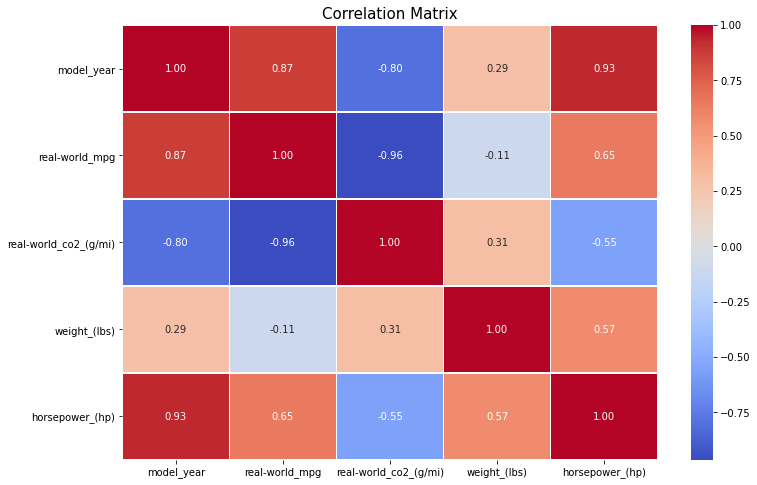

In [18]:
plt.rcParams['figure.figsize']=(12,8)
ax = plt.axes()
sns.heatmap(df_summary[df_summary['vehicle_type'] == 'All Car'][['model_year', 'real-world_mpg', 'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix', fontsize = 15)
plt.show()

#### Oil prices
#### Let's find out whether there is any correlation between oil prices and fuel consumption

In [19]:
oil_df = pd.read_csv(r'data\crude-oil-prices.csv')
oil_df.head()

Entity      Code  Year  Oil - Crude prices since 1861 (current $)
0  World  OWID_WRL  1861                                       0.49
1  World  OWID_WRL  1862                                       1.05
2  World  OWID_WRL  1863                                       3.15
3  World  OWID_WRL  1864                                       8.06
4  World  OWID_WRL  1865                                       6.59

In [20]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     160 non-null    object 
 1   Code                                       160 non-null    object 
 2   Year                                       160 non-null    int64  
 3   Oil - Crude prices since 1861 (current $)  160 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ KB


In [21]:
oil_df.columns = [i.lower().replace(' ', '_') for i in oil_df.columns]
oil_df.rename(columns={'oil_-_crude_prices_since_1861_(current_$)':'oil_price'}, inplace=True)

In [22]:
oil_df.describe()

year   oil_price
count   160.000000  160.000000
mean   1940.500000   12.810330
std      46.332134   23.538366
min    1861.000000    0.490000
25%    1900.750000    1.020000
50%    1940.500000    1.800000
75%    1980.250000   14.553460
max    2020.000000  111.669702

In [23]:
merged_df = df_summary[df_summary['vehicle_type'] == 'All Car'].groupby('model_year')[['real-world_mpg']].agg('mean').reset_index()

In [24]:
merged_df = merged_df.merge(oil_df[['year', 'oil_price']], left_on='model_year', right_on='year', how='inner')
merged_df.head()

model_year  real-world_mpg  year  oil_price
0        1975        13.45483  1975      11.53
1        1976        14.86139  1976      12.80
2        1977        15.58566  1977      13.92
3        1978        16.93760  1978      14.02
4        1979        17.24016  1979      31.61

In [82]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=merged_df['year'], y=merged_df['real-world_mpg'], mode='lines',
    line=dict(color='#3d9c49', width=4), connectgaps=False, name='Real-World MPG'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=merged_df['year'], y=merged_df['oil_price'], mode='lines',
    line=dict(color='#4a50bd', width=4), connectgaps=False, name='Oil Price, $'),
    secondary_y=True,
)

# Update xaxis properties
fig.update_xaxes(title_text="Model Year", showticklabels=True, ticks='outside', range=[1974, 2021], linewidth=2)

# Update yaxis properties
fig.update_yaxes(title_text="Fuel Consumption MPG", color='#007516', rangemode="tozero", showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=True, secondary_y=False, gridcolor='#00bf19',)
fig.update_yaxes(title_text="Oil price, $", color='#000875', rangemode="tozero", showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=True, secondary_y=True, gridcolor='#2a26ab')

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x}</b><br>Value: <b>%{y:.2f}</b>')

fig.update_layout(
    showlegend=True, autosize=False, plot_bgcolor='#ebebeb',
    width=900, height=550,

    grid={'xgap':0.5},
    legend={'bgcolor':'#e0e0e0',
            'x':0.748,
            'y':1.2
            },
    title={
        'text':'Fuel consumption and Oil prices since 1975',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    }
)

In [26]:
merged_df[['real-world_mpg', 'oil_price']].corr()

real-world_mpg  oil_price
real-world_mpg        1.000000   0.548966
oil_price             0.548966   1.000000

### Manufacturer 

In [27]:
df_man = pd.read_csv(r'data\table_export_manufacturer.csv')
df_man.head()

Manufacturer Model Year Regulatory Class Vehicle Type Production (000)  \
0          All       1975              All          All            10224   
1          All       1976              All          All            12334   
2          All       1977              All          All            14123   
3          All       1978              All          All            14448   
4          All       1979              All          All            13882   

  Production Share 2-Cycle MPG Real-World MPG Real-World MPG_City  \
0            1.000    15.33300       13.05970            12.01552   
1            1.000    16.70719       14.22136            13.18117   
2            1.000    17.70553       15.06743            14.00580   
3            1.000    18.60678       15.83777            14.68193   
4            1.000    18.69594       15.91271            14.87711   

  Real-World MPG_Hwy  ... Multivalve Engine Variable Valve Timing  \
0           14.61167  ...                 -                     -   
1           15.73946  ...                 -                     -   
2           16.60587  ...                 -                     -   
3           17.52390  ...                 -                     -   
4           17.39245  ...                 -                     -   

  Average Number of Gears Transmission - CVT (Non-Hybrid) 4 or Fewer Gears  \
0                       -                               -            0.129   
1                       -                               -            0.788   
2                       -                               -                -   
3                       -                               -            0.702   
4                     3.3                               -            0.938   

  5 Gears 6 Gears 7 Gears 8 Gears 9 or More Gears  
0   0.010       -       -       -               -  
1       -       -       -       -               -  
2       -       -       -       -               -  
3   0.073       -       -       -               -  
4   0.062       -       -       -               -  

[5 rows x 54 columns]

In [28]:
df_man.drop(columns=['2-Cycle MPG', 'Footprint (sq. ft.)', 'Engine Displacement', 'HP/Engine Displacement', 'Ton-MPG (Real-World)',
       '4 or Fewer Gears', '5 Gears', '6 Gears', '7 Gears', '8 Gears',
       '9 or More Gears'], inplace=True)

In [29]:
df_man.columns

Index(['Manufacturer', 'Model Year', 'Regulatory Class', 'Vehicle Type',
       'Production (000)', 'Production Share', 'Real-World MPG',
       'Real-World MPG_City', 'Real-World MPG_Hwy', 'Real-World CO2 (g/mi)',
       'Real-World CO2_City (g/mi)', 'Real-World CO2_Hwy (g/mi)',
       'Weight (lbs)', 'Horsepower (HP)',
       'Acceleration (0-60 time in seconds)', 'HP/Weight (lbs)',
       'Drivetrain - Front', 'Drivetrain - 4WD', 'Drivetrain - Rear',
       'Transmission - Manual', 'Transmission - Automatic',
       'Transmission - Lockup', 'Transmission - CVT (Hybrid)',
       'Transmission - Other', 'Fuel Delivery - Carbureted',
       'Fuel Delivery - Gasoline Direct Injection (GDI)',
       'Fuel Delivery - Port Fuel Injection',
       'Fuel Delivery - Throttle Body Injection', 'Fuel Delivery - Other',
       'Powertrain - Diesel', 'Powertrain - Electric Vehicle (EV)',
       'Powertrain - Plug-in Hybrid Electric Vehicle (PHEV)',
       'Powertrain - Fuel Cell Vehicle (FCV)',
  

In [30]:
# Remove '-' and ',' for further retyping
for i in ['Production (000)', 'Production Share', 'Real-World MPG', 'Weight (lbs)', 'Horsepower (HP)', 'HP/Weight (lbs)', 'Acceleration (0-60 time in seconds)']:
    df_man.loc[df_man[i] == '-', i] = np.nan
    
df_man.replace('-', 0, inplace=True)
df_man.replace(',', '', regex=True, inplace=True)

In [31]:
# Retype dataset
df_man = pd.concat([df_man.iloc[:,:4], df_man.iloc[:, 4:].apply(pd.to_numeric)], axis=1)

In [32]:
# Remove "Prelim." in 2021 year
df_man['Model Year'] = df_man['Model Year'].replace('Prelim. ', '', regex=True).astype('int')

In [33]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170 entries, 0 to 5169
Data columns (total 43 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Manufacturer                                         5170 non-null   object 
 1   Model Year                                           5170 non-null   int32  
 2   Regulatory Class                                     5170 non-null   object 
 3   Vehicle Type                                         5170 non-null   object 
 4   Production (000)                                     3870 non-null   float64
 5   Production Share                                     3870 non-null   float64
 6   Real-World MPG                                       3972 non-null   float64
 7   Real-World MPG_City                                  5170 non-null   float64
 8   Real-World MPG_Hwy                                   5170 non-null  

In [34]:
# Modify column names
df_man.columns = [i.lower().replace(' ', '_') for i in df_man.columns]

In [35]:
df_man['manufacturer'].unique()

array(['All', 'BMW', 'Ford', 'Honda', 'Hyundai', 'GM', 'Kia', 'Tesla',
       'Toyota', 'Mazda', 'Mercedes', 'Nissan', 'VW', 'Stellantis',
       'Subaru'], dtype=object)

In [36]:
df_man['manufacturer'].value_counts()

VW            376
Toyota        376
Ford          376
All           376
Honda         376
Mazda         376
GM            376
Stellantis    376
Nissan        376
Mercedes      329
Kia           329
Tesla         282
Subaru        282
Hyundai       282
BMW           282
Name: manufacturer, dtype: int64

In [37]:
df_man.isna().sum()[df_man.isna().sum() > 1]

production_(000)                       1300
production_share                       1300
real-world_mpg                         1198
weight_(lbs)                           1198
horsepower_(hp)                        1198
acceleration_(0-60_time_in_seconds)    1393
hp/weight_(lbs)                        1198
dtype: int64

In [38]:
# Remove Nan rows
df_man.dropna(subset=['real-world_mpg'], inplace=True)

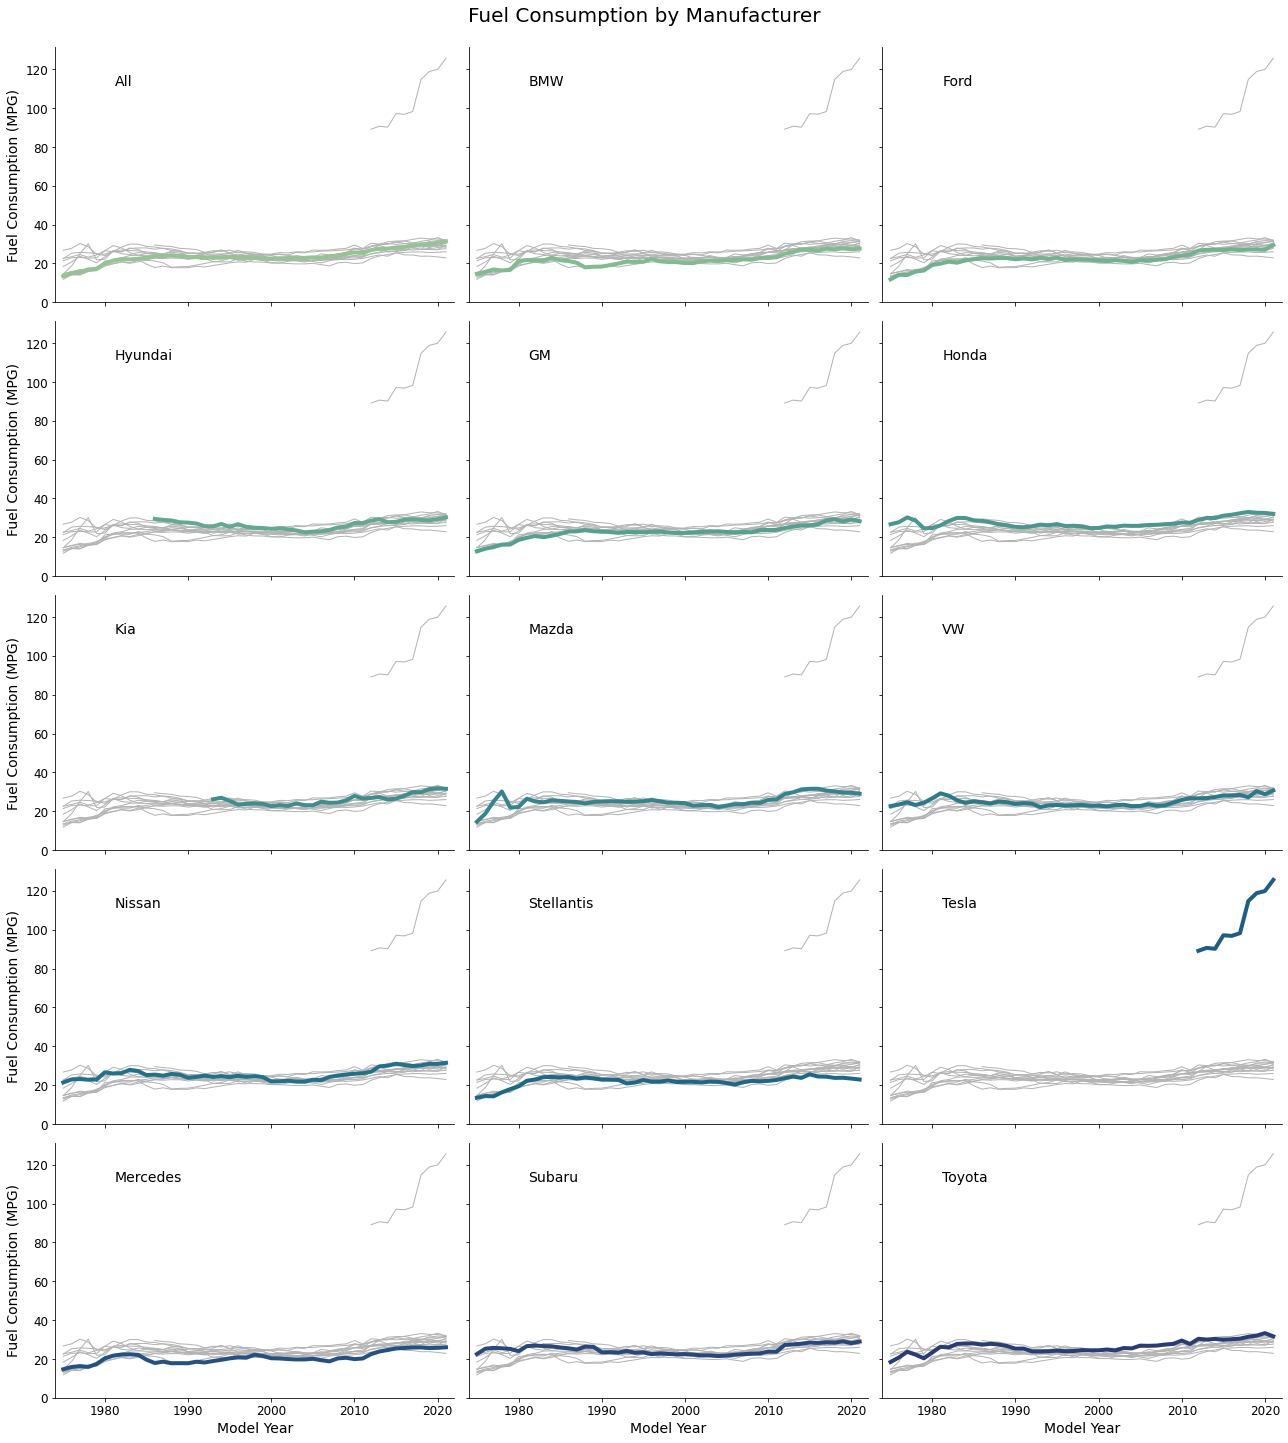

In [39]:
data=df_man[df_man['vehicle_type'] == 'All Car']

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="model_year", y="real-world_mpg", col="manufacturer", hue="manufacturer",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for veh_type, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.15, .85, veh_type, transform=ax.transAxes, fontsize=14)
    ax.tick_params(labelsize=12)    
    ax.grid(color='w', linewidth=0.5)

    # Plot every year's time series in the background
    sns.lineplot(
        data=data, x="model_year", y="real-world_mpg", units="manufacturer",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Set the lower and upper numerical bounds.
ax.set_xbound(1974, 2022)
ax.set_ybound(0,)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.fig.suptitle('Fuel Consumption by Manufacturer', fontsize=20,  y=1)
g.set_axis_labels("Model Year", "Fuel Consumption (MPG)", fontsize=14)
g.tight_layout()

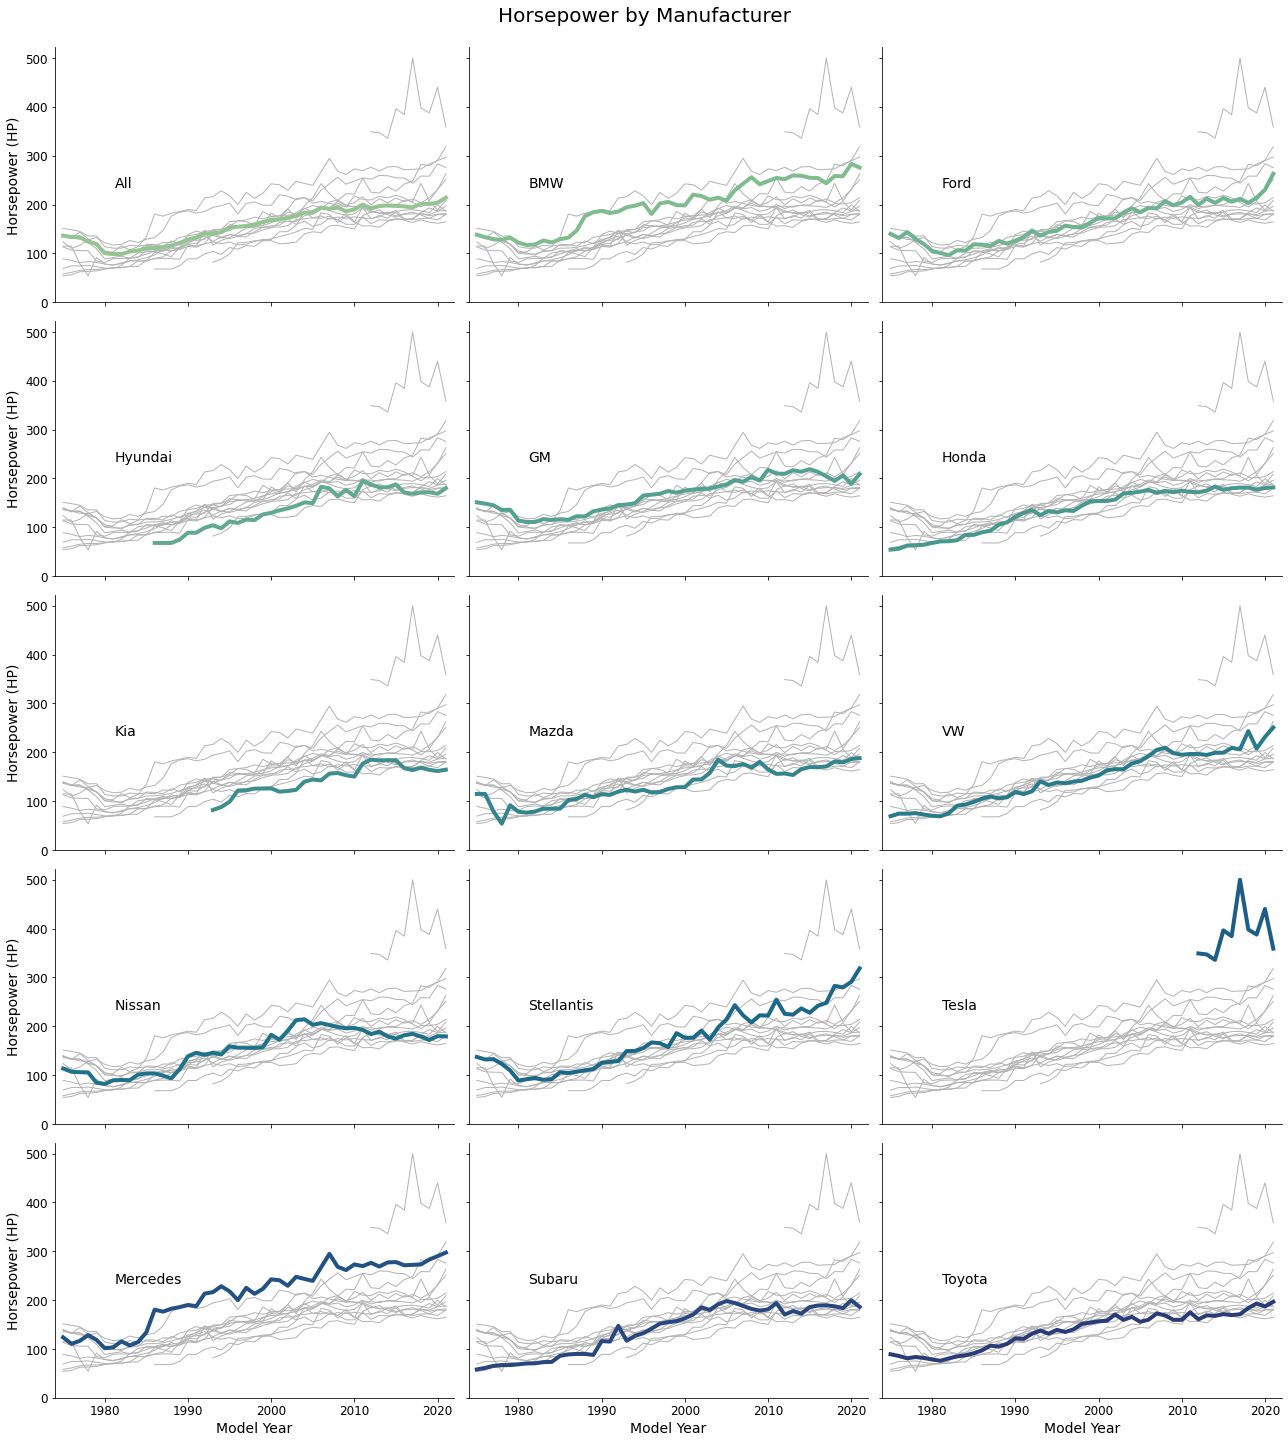

In [40]:
data=df_man[(df_man['vehicle_type'] == 'All Car')]

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="model_year", y="horsepower_(hp)", col="manufacturer", hue="manufacturer",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for veh_type, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.15, .45, veh_type, transform=ax.transAxes, fontsize=14)
    ax.tick_params(labelsize=12)    
    ax.grid(color='w', linewidth=0.5)

    # Plot every year's time series in the background
    sns.lineplot(
        data=data, x="model_year", y="horsepower_(hp)", units="manufacturer",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Set the lower and upper numerical bounds.
ax.set_xbound(1974, 2022)
ax.set_ybound(0,)


# Tweak the supporting aspects of the plot
g.set_titles("")
g.fig.suptitle('Horsepower by Manufacturer', fontsize=20, y=1)
g.set_axis_labels("Model Year", "Horsepower (HP)", fontsize=14)
g.tight_layout()

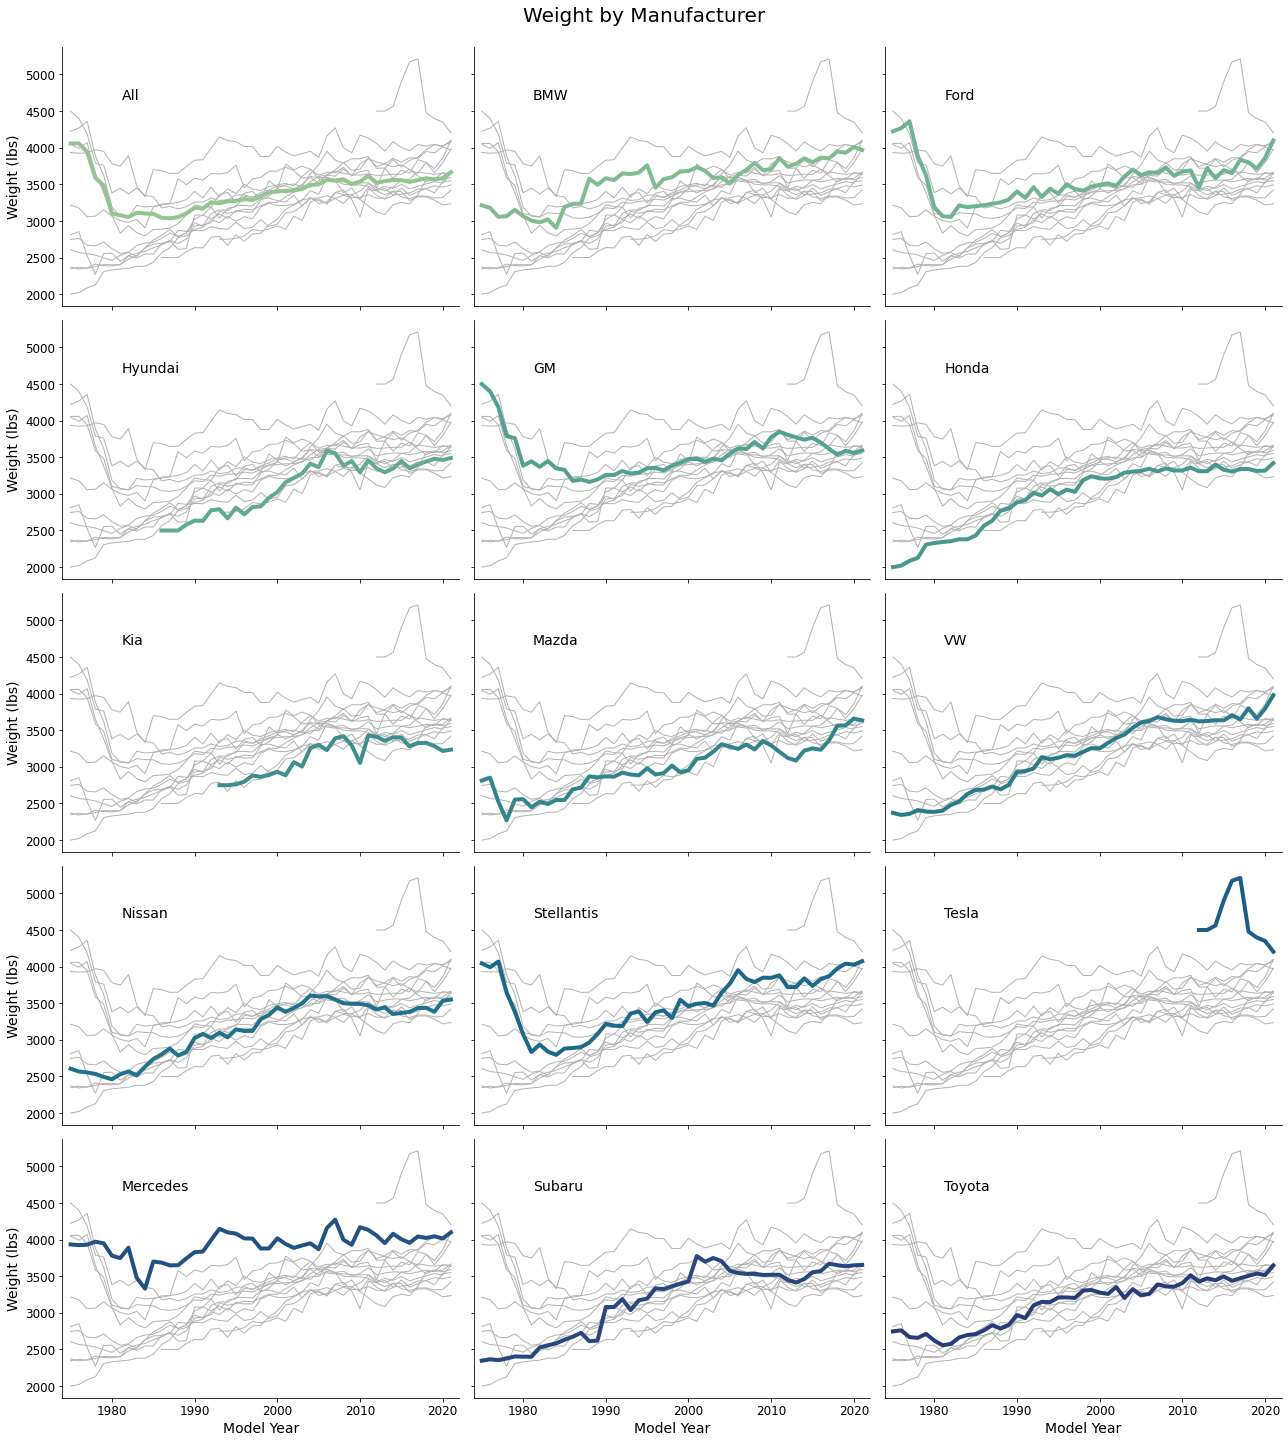

In [41]:
data=df_man[(df_man['vehicle_type'] == 'All Car')]

# Plot each year's time series in its own facet
g = sns.relplot(
    data=data,
    x="model_year", y="weight_(lbs)", col="manufacturer", hue="manufacturer",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for veh_type, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(0.15, .8, veh_type, transform=ax.transAxes, fontsize=14)
    ax.tick_params(labelsize=12)    
    ax.grid(color='w', linewidth=0.5)

    # Plot every year's time series in the background
    sns.lineplot(
        data=data, x="model_year", y="weight_(lbs)", units="manufacturer",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Set the lower and upper numerical bounds.
ax.set_xbound(1974, 2022)
# ax.set_ybound(0,)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.fig.suptitle('Weight by Manufacturer', fontsize=20, y=1)
g.set_axis_labels("Model Year", "Weight (lbs)", fontsize=14)
g.tight_layout()

#### As we have found out earlier, we can observe here a positive correlation between 'horsepower_(hp)' and 'real-world_mpg'. We can make here a wrong suggestion: we have to support making a lof of powerful and fast cars to protect our planet from CO2 emissions, cause fast and powerful cars consumig less fuel.

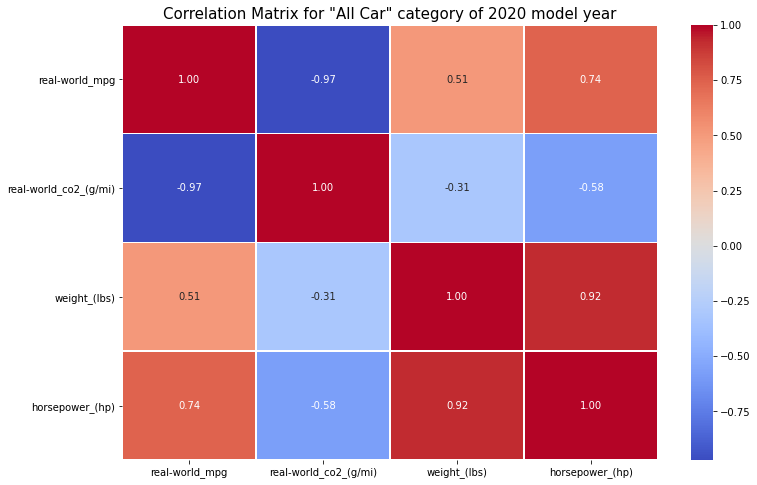

In [42]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['model_year'] == 2020)][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix for "All Car" category of 2020 model year', fontsize = 15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

#### But we know that Tesla make electric cars that are less consuming and very fast and powerful cars.

In [43]:
df_man[(df_man['vehicle_type'] == 'All Car')].groupby(['manufacturer', 'model_year']).agg({'acceleration_(0-60_time_in_seconds)':'mean', 
                                                                                           'horsepower_(hp)':'mean', 
                                                                                           'real-world_mpg':'mean'}).sort_values(by='acceleration_(0-60_time_in_seconds)', ascending=True).reset_index().head(10)

manufacturer  model_year  acceleration_(0-60_time_in_seconds)  \
0        Tesla        2020                               3.5499   
1        Tesla        2017                               3.7781   
2        Tesla        2015                               4.4190   
3        Tesla        2016                               4.6948   
4        Tesla        2018                               4.7348   
5        Tesla        2019                               4.7887   
6        Tesla        2021                               4.9163   
7        Tesla        2014                               5.2756   
8        Tesla        2013                               5.5000   
9        Tesla        2012                               5.5000   

   horsepower_(hp)  real-world_mpg  
0         440.1357       119.91566  
1         499.9051        98.21854  
2         396.1661        97.13512  
3         384.3064        96.81841  
4         397.9319       114.75860  
5         387.6592       118.84697  
6         358.8458       125.65058  
7         335.7883        90.16863  
8         346.9840        90.65500  
9         349.0000        89.14065

In [44]:
data = df_man[(df_man['model_year'] == 2020) & (df_man['vehicle_type'] == 'All Car')].groupby('manufacturer')['real-world_mpg'].agg('mean').apply(lambda x: round(x, 2)).sort_values(ascending=False).reset_index()

fig = go.Figure(go.Bar(
    x=data['manufacturer'],y=data['real-world_mpg'],
    marker={'color': data['real-world_mpg']},  
    text=data['real-world_mpg'],
    textposition = "outside",
    hoverinfo='x + y',
    name=''    
    ))
fig.update_traces(hovertemplate='Manufacturer: <b>%{x}</b><br>Fuel Consumption: <b>%{y:.2f} MPG</b>')
fig.update_layout(title_text='Fuel Consumption By Manufacturer in 2020', 
                  xaxis = dict(title="Manufacturer",
                               tickangle=330),
                  yaxis_title="Fuel Consumption (MPG)",
                  title_x=0.5, 
                  autosize=False, 
                  plot_bgcolor='#ebebeb', 
                  width=900, 
                  height=450)
fig.show()

#### And Tesla cars are too heavy in comparison with others

In [45]:
fig = px.box(df_man[(df_man['vehicle_type'] == 'All Car')], x="manufacturer", y="weight_(lbs)", color='manufacturer', color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_xaxes(title_text="Manufacturer", showticklabels=True, ticks='outside', tickangle=330)
fig.update_yaxes(title_text="Weight (lbs)", showticklabels=True, ticks='outside')
fig.update_layout(title_text='Weight of cars by Manufacturer', title_x = 0.5, width=850, height=500, showlegend=False, plot_bgcolor='#ebebeb', boxgap=0)
fig.show()

In [46]:
fig = px.scatter(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['model_year'] == 2020)], x="weight_(lbs)", y="horsepower_(hp)", color="manufacturer",
                 size='real-world_mpg', color_discrete_sequence=px.colors.qualitative.Dark24, 
                 size_max=25, custom_data=['real-world_mpg', 'manufacturer'])
fig.update_traces(hovertemplate='Manufacturer: <b>%{customdata[1]}</b><br>Weight: <b>%{x:.0f} (lbs)</b><br>Horsepower: <b>%{y:.0f} HP</b><br>Fuel Consumption: <b>%{customdata[0]:.2f} MPG</b>')
fig.update_xaxes(title_text="Weight", showticklabels=True, ticks='outside', range=[3190, 4400])
fig.update_yaxes(title_text="Horsepower", showticklabels=True, ticks='outside', range=[145, 465])
fig.update_layout(title_text='Scatter of Weight and Horsepower by Manufacturer<br>(Size by Fuel Consumption)', title_x = 0.5, width=850, plot_bgcolor='#ebebeb', legend_title='Manufacturer')
fig.show()

#### So if we exclude Tesla from our correlation matrix we will observe an opposite values

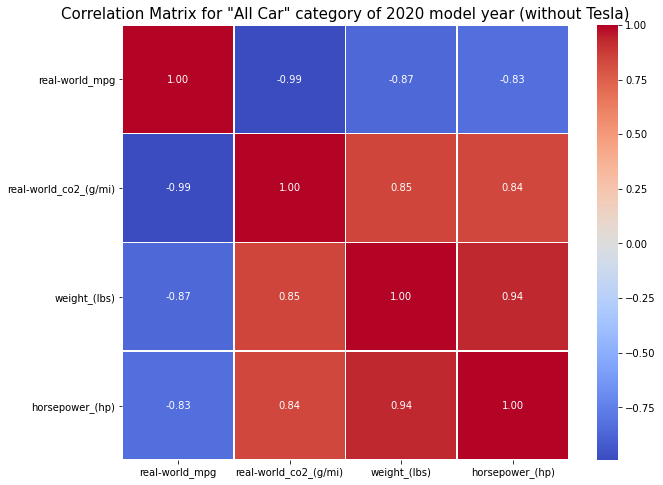

In [47]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['model_year'] == 2020) & (df_man['manufacturer'] != 'Tesla')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix for "All Car" category of 2020 model year (without Tesla)', fontsize = 15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

### Drivetrain

In [48]:
data = df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] == 'All')]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['drivetrain_-_4wd'],
    hoverinfo='x+y+name',
    mode='lines',
    name='4WD',
    stackgroup='one',
    line=dict(width=3.5, color='#d40000')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['drivetrain_-_front'],
    hoverinfo='x+y+name',
    mode='lines',
    name='FWD',
    stackgroup='one',
    line=dict(width=3.5, color='#d4d400')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['drivetrain_-_rear'],
    hoverinfo='x+y+name',
    mode='lines',
    name='RWD',
    stackgroup='one',
    line=dict(width=3.5, color='#008ae0')
))

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x}</b><br>Value: <b>%{y}</b>')

fig.update_layout(
    yaxis_range=(0, 1),
    xaxis={'title':{'text':'Year',
                    'font':{'size':16, 'family':'Arial'}},
           'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           },
    yaxis={'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           'tickvals':[(i+1)*0.1 for i in range(10)],
           'tickformat':'.0%'
           },
    
    showlegend=True, autosize=False,
    width=900, height=550,
    legend={'bgcolor':'#e0e0e0',
            'x':0.898,
            'y':1.2
            },
    title={
        'text':'Distribution of "All Car" category by drivetrain',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    }
)
fig.show()

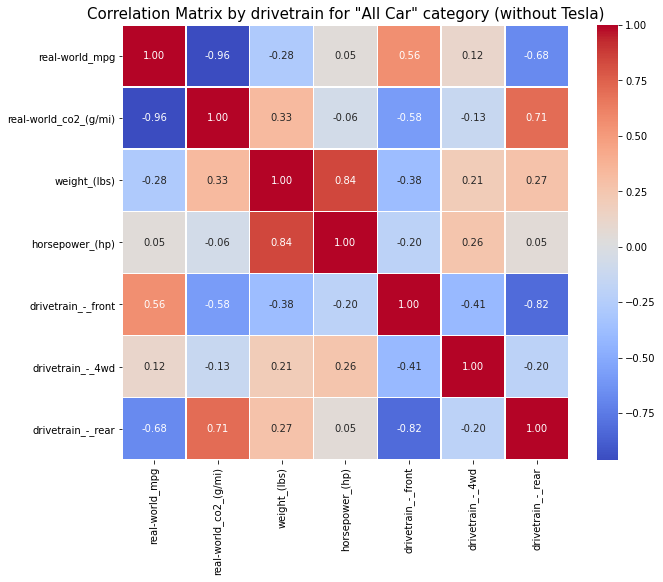

In [49]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] != 'Tesla')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'drivetrain_-_front', 'drivetrain_-_4wd', 'drivetrain_-_rear']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix by drivetrain for "All Car" category (without Tesla)', fontsize = 15)
plt.show()

##### *We excluded Tesla cause it has a great impact on drivetrain correlation. It hides a high consuming of fuel for 4WD and RWD cars.

### Fuel

In [50]:
data = df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] == 'All')][5::10]

fig = go.Figure(data=[
    go.Bar(name='Gasoline', x=data['model_year'], y=data['powertrain_-_gasoline'], text=data['powertrain_-_gasoline']),
    go.Bar(name='Diesel', x=data['model_year'], y=data['powertrain_-_diesel'], text=data['powertrain_-_diesel']),
    go.Bar(name='Electric vehicle (EV)', x=data['model_year'], y=data['powertrain_-_electric_vehicle_(ev)'], text=data['powertrain_-_electric_vehicle_(ev)']),
    go.Bar(name='Plug-in hybrid electric vehicle (PHEV)', x=data['model_year'], y=data['powertrain_-_plug-in_hybrid_electric_vehicle_(phev)'], text=data['powertrain_-_plug-in_hybrid_electric_vehicle_(phev)']),
    go.Bar(name='Gasoline hybrid', x=data['model_year'], y=data['powertrain_-_gasoline_hybrid'], text=data['powertrain_-_gasoline_hybrid'])
])
# Change the bar mode
fig.update_traces(hovertemplate='%{y:.1%}', texttemplate="%{y:.1%}", textangle=0, hoverlabel_namelength=-1)
fig.update_layout(title={'text':'Distribution of "All Car" category by fuel',
                         'font':{'size':20, 'family':'Arial'},
                         'pad':{'l':33}},
                  barmode='group', 
                  plot_bgcolor='#ebebeb', 
                  boxgap=0,
                  width=1300, height=450,
                  legend={'bgcolor':'#e0e0e0',
                          'x':0.763,
                          'y':1.44},
                  yaxis={'showticklabels':True,
                         'ticks':'outside',
                         'showgrid':True,
                         'tickvals':[i*0.1 for i in range(11)],
                         'tickformat':'.0%',
                         'range':(0,1)},
                  xaxis={'showticklabels':True,
                         'ticks':'outside',
                         'showgrid':False,
                         'title':'Model Year'
                         },
                  )
fig.show()

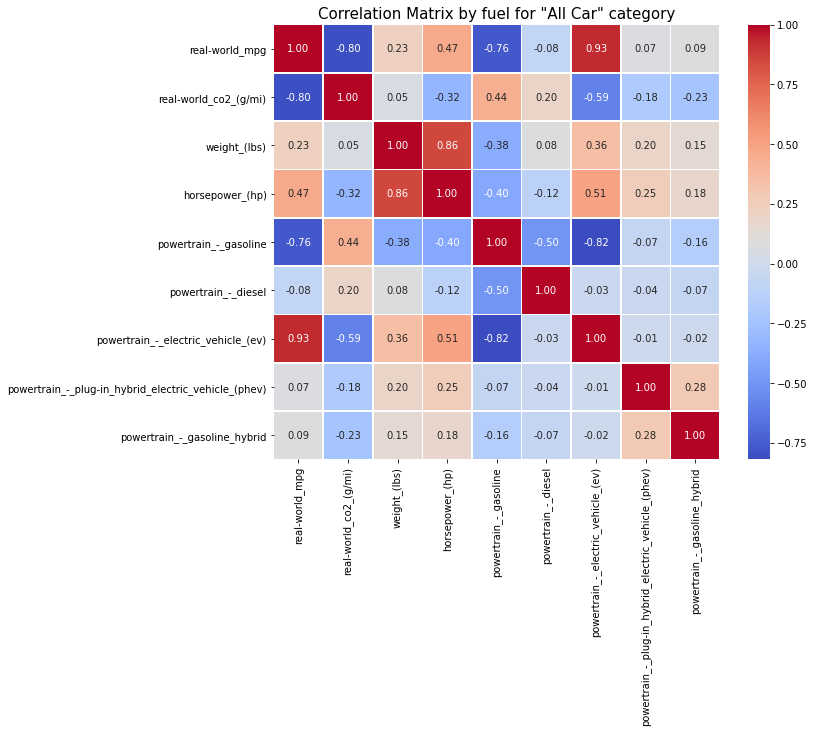

In [51]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'powertrain_-_gasoline', 'powertrain_-_diesel',
       'powertrain_-_electric_vehicle_(ev)',
       'powertrain_-_plug-in_hybrid_electric_vehicle_(phev)',
       'powertrain_-_gasoline_hybrid']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix by fuel for "All Car" category', fontsize = 15)
plt.show()

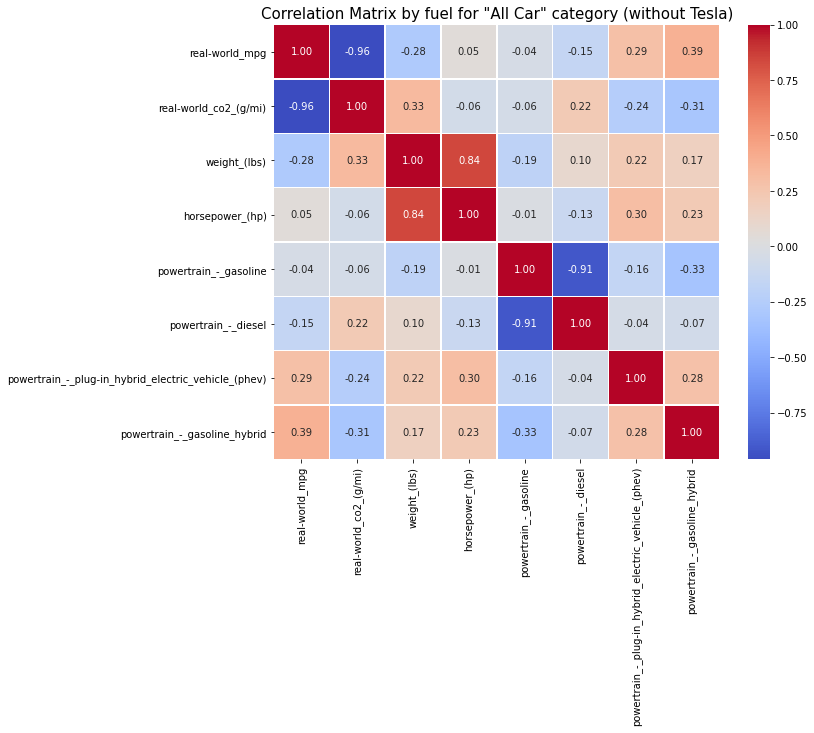

In [52]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] != 'Tesla')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'powertrain_-_gasoline', 'powertrain_-_diesel',
       # 'powertrain_-_electric_vehicle_(ev)',
       'powertrain_-_plug-in_hybrid_electric_vehicle_(phev)',
       'powertrain_-_gasoline_hybrid']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix by fuel for "All Car" category (without Tesla)', fontsize = 15)
plt.show()

#### Some conclusions about fuel distribution.
##### * Gasoline is a main fuel for a long time.<br> * Hybrid and electric vehicles become more popular in recent years.<br> * EV are the most efficient in fuel consumption.<br> * Hybrids are the most efficient between non electric vehicles in fuel consumption.

### Fuel system

In [53]:
data = df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] == 'All')]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['fuel_delivery_-_carbureted'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Carbureted',
    stackgroup='one',
    line=dict(width=2.5)
))

fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['fuel_delivery_-_throttle_body_injection'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Throttle body injection',
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['fuel_delivery_-_port_fuel_injection'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Port fuel injection',
    stackgroup='one',
    line=dict(width=2.5)
))

fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['fuel_delivery_-_gasoline_direct_injection_(gdi)'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Gasoline direct injection',
    stackgroup='one',
    line=dict(width=2.5)
))

fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['fuel_delivery_-_other'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Other',
    stackgroup='one',
    line=dict(width=2.5)
))

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x}</b><br>Value: <b>%{y}</b>')

fig.update_layout(
    yaxis_range=(0, 1),
    xaxis={'title':{'text':'Year',
                    'font':{'size':16, 'family':'Arial'}},
           'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           },
    yaxis={'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           'tickvals':[(i+1)*0.1 for i in range(10)],
           'tickformat':'.0%'
           },
    
    showlegend=True, autosize=False,
    width=1200, height=750,
    legend={'bgcolor':'#e0e0e0',
            'x':0.816,
            'y':1.2
            },
    title={
        'text':'Distribution of "All Car" category by fuel system',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    },
    hoverlabel_namelength=-1
)
fig.show()


#### Mostly Tesla and other old vehicles has "Other" fuel system, so we have to exclude Tesla from Corr matrix by fuel system. (There is no fuel system in electric)

In [54]:
df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['fuel_delivery_-_other'] > 0)][['manufacturer', 'model_year', 'real-world_mpg', 'fuel_delivery_-_carbureted',
       'fuel_delivery_-_gasoline_direct_injection_(gdi)',
       'fuel_delivery_-_port_fuel_injection',
       'fuel_delivery_-_throttle_body_injection',
       'fuel_delivery_-_other']].sort_values(by=['fuel_delivery_-_other', 'model_year'], ascending=[False, False]).head()

manufacturer  model_year  real-world_mpg  fuel_delivery_-_carbureted  \
4229        Tesla        2021       125.65058                         0.0   
4228        Tesla        2020       119.91566                         0.0   
4227        Tesla        2019       118.84697                         0.0   
4226        Tesla        2018       114.75860                         0.0   
4225        Tesla        2017        98.21854                         0.0   

      fuel_delivery_-_gasoline_direct_injection_(gdi)  \
4229                                              0.0   
4228                                              0.0   
4227                                              0.0   
4226                                              0.0   
4225                                              0.0   

      fuel_delivery_-_port_fuel_injection  \
4229                                  0.0   
4228                                  0.0   
4227                                  0.0   
4226                                  0.0   
4225                                  0.0   

      fuel_delivery_-_throttle_body_injection  fuel_delivery_-_other  
4229                                      0.0                    1.0  
4228                                      0.0                    1.0  
4227                                      0.0                    1.0  
4226                                      0.0                    1.0  
4225                                      0.0                    1.0

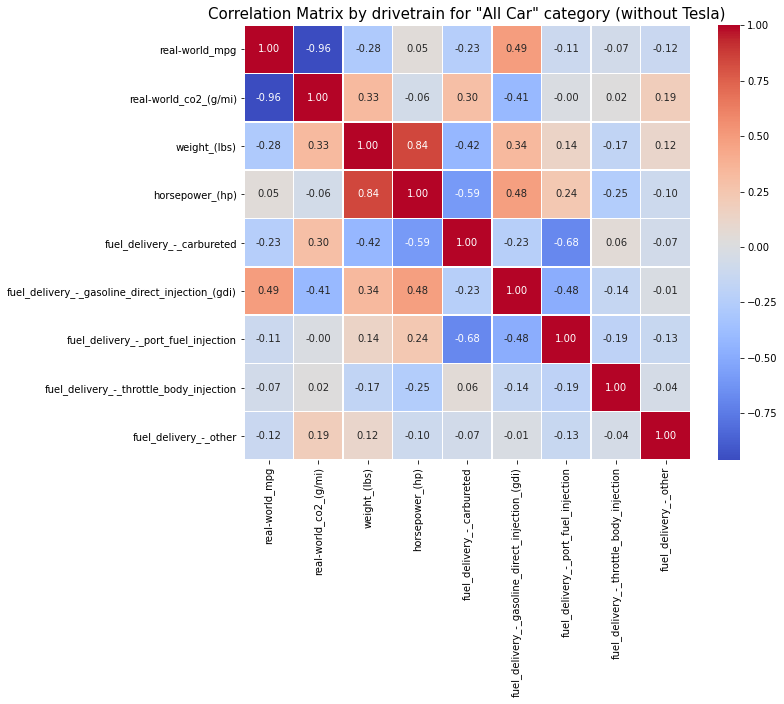

In [55]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] != 'Tesla')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'fuel_delivery_-_carbureted',
       'fuel_delivery_-_gasoline_direct_injection_(gdi)',
       'fuel_delivery_-_port_fuel_injection',
       'fuel_delivery_-_throttle_body_injection', 'fuel_delivery_-_other']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix by drivetrain for "All Car" category (without Tesla)', fontsize = 15)
plt.show()

#### Some conclusions about fuel system.
##### * GDI looks like the most recent and the most efficient technology for non electric vehicles. <br> * Hеre we can find out that fuel system technologies replace each other with time.<br> * Growth of "Other fuel system" consists of Tesla company impact in recent years.

### Transmission

In [56]:
data = df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] == 'All')]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['transmission_-_manual'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Manual',
    stackgroup='one',
    line=dict(width=3.5, color='#d40000')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['transmission_-_automatic'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Automatic',
    stackgroup='one',
    line=dict(width=3.5, color='#d4d400')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['transmission_-_lockup'],
    hoverinfo='x+y+name',
    mode='lines',
    name='Lockup',
    stackgroup='one',
    line=dict(width=3.5, color='#008ae0')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['transmission_-_cvt_(hybrid)'],
    hoverinfo='x+y+name',
    mode='lines',
    name='CVT (hybrid)',
    stackgroup='one',
    line=dict(width=3.5, color='#a4e753')
))
fig.add_trace(go.Scatter(
    x=data['model_year'], y=data['transmission_-_cvt_(non-hybrid)'],
    hoverinfo='x+y+name',
    mode='lines',
    name='CVT (non-hybrid)',
    stackgroup='one',
    line=dict(width=3.5, color='#103450')
))

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x}</b><br>Value: <b>%{y}</b>')

fig.update_layout(
    yaxis_range=(0, 1),
    xaxis={'title':{'text':'Year',
                    'font':{'size':16, 'family':'Arial'}},
           'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           },
    yaxis={'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           'tickvals':[(i+1)*0.1 for i in range(10)],
           'tickformat':'.0%'
           },
    
    showlegend=True, autosize=False,
    width=900, height=550,
    legend={'bgcolor':'#e0e0e0',
            'x':0.797,
            'y':1.32
            },
    title={
        'text':'Distribution of "All Car" category by transmission',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    }
)
fig.show()

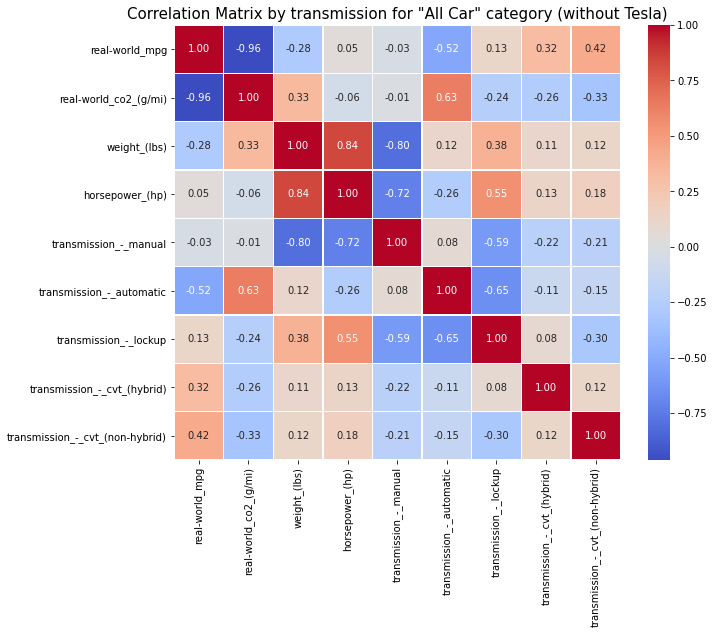

In [57]:
ax = plt.axes()
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(df_man[(df_man['vehicle_type'] == 'All Car') & (df_man['manufacturer'] != 'Tesla')][['real-world_mpg',
       'real-world_co2_(g/mi)', 'weight_(lbs)', 'horsepower_(hp)',
       'transmission_-_manual', 'transmission_-_automatic',
       'transmission_-_lockup', 'transmission_-_cvt_(hybrid)',
       'transmission_-_cvt_(non-hybrid)']].corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True)
ax.set_title('Correlation Matrix by transmission for "All Car" category (without Tesla)', fontsize = 15)
plt.show()

#### Some conclusions about transmission distribution.
##### * Manual transmission decreases almost all the time. <br> * CVT transmission  gets popular recent years (On my point the main reason is that CVT is more cheaper than others transmissions).<br> * Automatic transmission also gets popular recent years but first of all thanks for Tesla, cause Automatic transmission includes electric vehicles.<br> * Lock up transmission plugged in powerful cars, so it has a bad perfomance in fuel consumption/

In [58]:
# CVT (Non-hybrid)
df_man[(df_man['vehicle_type'] == 'All Car')][['manufacturer', 'model_year', 'real-world_mpg', 'weight_(lbs)', 'horsepower_(hp)',
       'transmission_-_manual', 'transmission_-_automatic',
       'transmission_-_lockup', 'transmission_-_cvt_(hybrid)',
       'transmission_-_cvt_(non-hybrid)']].sort_values(by=['transmission_-_cvt_(non-hybrid)', 'model_year'], ascending=[False, False]).head()

manufacturer  model_year  real-world_mpg  weight_(lbs)  horsepower_(hp)  \
3379       Nissan        2020        30.86338      3532.858         179.7866   
3380       Nissan        2021        31.44061      3550.040         179.1228   
3378       Nissan        2019        30.96230      3382.974         171.6674   
3375       Nissan        2016        30.32848      3382.406         181.6416   
3377       Nissan        2018        30.12803      3437.393         178.8375   

      transmission_-_manual  transmission_-_automatic  transmission_-_lockup  \
3379                  0.006                       0.0                  0.045   
3380                  0.003                       0.0                  0.056   
3378                  0.008                       0.0                  0.067   
3375                  0.015                       0.0                  0.077   
3377                  0.007                       0.0                  0.093   

      transmission_-_cvt_(hybrid)  transmission_-_cvt_(non-hybrid)  
3379                        0.000                            0.949  
3380                        0.000                            0.941  
3378                        0.001                            0.925  
3375                        0.001                            0.907  
3377                        0.001                            0.899

In [59]:
# Automatic
df_man[(df_man['vehicle_type'] == 'All Car')][['manufacturer', 'model_year', 'real-world_mpg', 'weight_(lbs)', 'horsepower_(hp)',
       'transmission_-_manual', 'transmission_-_automatic',
       'transmission_-_lockup', 'transmission_-_cvt_(hybrid)',
       'transmission_-_cvt_(non-hybrid)']].sort_values(by=['transmission_-_automatic', 'model_year'], ascending=[False, False]).head()

manufacturer  model_year  real-world_mpg  weight_(lbs)  horsepower_(hp)  \
4229        Tesla        2021       125.65058      4203.630         358.8458   
4228        Tesla        2020       119.91566      4351.189         440.1357   
4227        Tesla        2019       118.84697      4397.266         387.6592   
4226        Tesla        2018       114.75860      4477.742         397.9319   
4225        Tesla        2017        98.21854      5211.807         499.9051   

      transmission_-_manual  transmission_-_automatic  transmission_-_lockup  \
4229                    0.0                       1.0                    0.0   
4228                    0.0                       1.0                    0.0   
4227                    0.0                       1.0                    0.0   
4226                    0.0                       1.0                    0.0   
4225                    0.0                       1.0                    0.0   

      transmission_-_cvt_(hybrid)  transmission_-_cvt_(non-hybrid)  
4229                          0.0                              0.0  
4228                          0.0                              0.0  
4227                          0.0                              0.0  
4226                          0.0                              0.0  
4225                          0.0                              0.0

In [60]:
# Lockup
df_man[(df_man['vehicle_type'] == 'All Car')][['manufacturer', 'model_year', 'real-world_mpg', 'weight_(lbs)', 'horsepower_(hp)',
       'transmission_-_manual', 'transmission_-_automatic',
       'transmission_-_lockup', 'transmission_-_cvt_(hybrid)',
       'transmission_-_cvt_(non-hybrid)']].sort_values(by=['transmission_-_lockup', 'model_year'], ascending=[False, False]).head()

manufacturer  model_year  real-world_mpg  weight_(lbs)  horsepower_(hp)  \
4706     Mercedes        2021        26.01233      4099.110         297.3933   
4705     Mercedes        2020        25.74723      4015.110         289.9651   
4683     Mercedes        1998        22.18881      3878.153         212.8497   
4682     Mercedes        1997        20.63856      4013.587         225.1008   
1948          Kia        1993        26.13454      2750.000          82.0000   

      transmission_-_manual  transmission_-_automatic  transmission_-_lockup  \
4706                    0.0                       0.0                    1.0   
4705                    0.0                       0.0                    1.0   
4683                    0.0                       0.0                    1.0   
4682                    0.0                       0.0                    1.0   
1948                    0.0                       0.0                    1.0   

      transmission_-_cvt_(hybrid)  transmission_-_cvt_(non-hybrid)  
4706                          0.0                              0.0  
4705                          0.0                              0.0  
4683                          0.0                              0.0  
4682                          0.0                              0.0  
1948                          0.0                              0.0

### Production

In [61]:
data = df_man[(df_man['vehicle_type'] == 'All') & (df_man['manufacturer'] == 'All') & (df_man['model_year'] < 2021)][['model_year', 'production_(000)']].copy()
data['production'] = data['production_(000)'] * 1000

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['model_year'], y=data['production'], name='', line=dict(color='#00089c', width=4)))

fig.add_annotation(
    x=0.113,
    y=0.8,
    xref="x domain",
    yref="y domain",
    text="Second Oil Crisis",
    arrowhead=3,
    arrowsize=1,
    arrowwidth=2.5,
    ax=10,
    ay=-30,
    bordercolor="#000",
    borderwidth=2,
    borderpad=2,
    bgcolor="#ffd21f",
)
fig.add_annotation(
    x=0.71,
    y=0.81,
    xref="x domain",
    yref="y domain",
    text="Financial crisis 2007-08",
    arrowhead=3,
    arrowsize=1,
    arrowwidth=2.5,
    ax=-70,
    ay=30,
    bordercolor="#000",
    borderwidth=2,
    borderpad=2,
    bgcolor="#ffd21f",
)
fig.add_annotation(
    x=0.95,
    y=0.9,
    xref="x domain",
    yref="y domain",
    text="COVID-19",
    arrowhead=3,
    arrowsize=1,
    arrowwidth=2.5,
    ax=-35,
    ay=25,
    bordercolor="#000",
    borderwidth=2,
    borderpad=2,
    bgcolor="#ffd21f",
)

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x} </b><br>Production amount: <b>%{y:~s}</b>')

fig.update_layout(
    xaxis={'title':{'text':'Year',
                    'font':{'size':16, 'family':'Arial'}},
           'showticklabels':True,
           'ticks':'outside',
           'showgrid':True,
           'range':[1974, 2021]
           },
    yaxis={'title':{'text':'Production amount',
                    'font':{'size':16, 'family':'Arial'}},'showticklabels':True,
           'ticks':'outside',
           'tickformat':'~s',
           'showgrid':True,
           'range':[0,17_500_000]
           },
    
    width=800, height=500,
    title={
        'text':'Production amount of vehicles of "All Cars" category in USA since 1975',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    },
    plot_bgcolor='#ebebeb',
    hoverlabel_namelength=-1
)
fig.show()

#### Let's add Anual CO2 Emissions information and check correlation with production amount

In [62]:
co2 = pd.read_csv(r'data\annual-co2-emissions-per-country.csv')
co2.head()

Entity Code  Year  Annual CO2 emissions
0  Afghanistan  AFG  1949                 14656
1  Afghanistan  AFG  1950                 84272
2  Afghanistan  AFG  1951                 91600
3  Afghanistan  AFG  1952                 91600
4  Afghanistan  AFG  1953                106256

In [63]:
co2_us = co2[(co2['Code'] == 'USA')].copy()

In [64]:
co2_us.head()

Entity Code  Year  Annual CO2 emissions
23173  United States  USA  1800                252816
23174  United States  USA  1801                267472
23175  United States  USA  1802                289456
23176  United States  USA  1803                296784
23177  United States  USA  1804                333424

In [65]:
co2_us['lag_co2'] = co2_us['Annual CO2 emissions'].shift(1)
co2_us['percent_change_co2'] = round(((co2_us['Annual CO2 emissions'] / co2_us['lag_co2']) - 1)*100, 2)

In [66]:
co2_us.describe().T

count          mean           std       min  \
Year                  221.0  1.910000e+03  6.394138e+01    1800.0   
Annual CO2 emissions  221.0  1.885625e+09  2.079362e+09  252816.0   
lag_co2               220.0  1.872774e+09  2.075290e+09  252816.0   
percent_change_co2    220.0  4.886318e+00  8.148896e+00     -18.1   

                               25%           50%           75%           max  
Year                  1.855000e+03  1.910000e+03  1.965000e+03  2.020000e+03  
Annual CO2 emissions  3.816056e+07  1.257773e+09  3.399342e+09  6.134521e+09  
lag_co2               3.691022e+07  1.230817e+09  3.297918e+09  6.134521e+09  
percent_change_co2    5.275000e-01  4.445000e+00  9.207500e+00  3.350000e+01

In [67]:
# create a subset with production amount information
prod_subset = df_man[(df_man['vehicle_type'] == 'All') & (df_man['manufacturer'] == 'All')][['model_year', 'production_(000)']]
prod_subset.head()

model_year  production_(000)
0        1975           10224.0
1        1976           12334.0
2        1977           14123.0
3        1978           14448.0
4        1979           13882.0

In [68]:
prod_subset['lag_prod'] = prod_subset['production_(000)'].shift(1)
prod_subset['percent_change_prod'] = round(((prod_subset['production_(000)'] / prod_subset['lag_prod']) - 1)*100, 2)

In [69]:
prod_subset.head()

model_year  production_(000)  lag_prod  percent_change_prod
0        1975           10224.0       NaN                  NaN
1        1976           12334.0   10224.0                20.64
2        1977           14123.0   12334.0                14.50
3        1978           14448.0   14123.0                 2.30
4        1979           13882.0   14448.0                -3.92

In [70]:
fig = make_subplots(specs=[[{"secondary_y": True}]], shared_yaxes=True)

fig.add_trace(
    go.Scatter(x=co2_us[(co2_us['Year'] > 1975)]['Year'], y=co2_us[(co2_us['Year'] > 1974)]['percent_change_co2'], mode='lines',
    line=dict(color='#207321', width=4), connectgaps=False, name='Percent change, CO2'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=prod_subset[(prod_subset['model_year'] < 2021)]['model_year'], y=prod_subset[(prod_subset['model_year'] < 2021)]['percent_change_prod'], mode='lines',
    line=dict(color='#72207d', width=4), connectgaps=False, name='Percent change, Production'),
    secondary_y=True,
)

# Update xaxis properties
fig.update_xaxes(title_text="Year", showticklabels=True, ticks='outside', range=[1974, 2021], linewidth=2)

# Update yaxis properties
fig.update_yaxes(title_text="Percent change, CO2", color='#31872f', showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=False, secondary_y=False, )
fig.update_yaxes(title_text="Percent change, Production", color='#72207d', showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=False, secondary_y=True, range=[-46.5,39])

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x} </b><br>Percent change: <b>%{y:.2f}%</b>')

fig.update_layout(
    showlegend=True, autosize=False, plot_bgcolor='#ebebeb',
    width=900, height=550,
    grid={'xgap':0.5},
    legend={'bgcolor':'#e0e0e0',
            'x':0.656,
            'y':1.14
            },
    title={
        'text':'Percent change of CO2 Emissions<br> and Production of vehicles',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    }
)

In [71]:
co2_prod = co2_us.merge(prod_subset, left_on='Year', right_on='model_year', how='inner')
co2_prod.rename(columns={'percen_change_x':'percen_change_CO2', 'percen_change_y':'percen_change_prod'}, inplace=True)
co2_prod.head()

Entity Code  Year  Annual CO2 emissions       lag_co2  \
0  United States  USA  1975            4478038483  4.620820e+09   
1  United States  USA  1976            4747563213  4.478038e+09   
2  United States  USA  1977            4889398200  4.747563e+09   
3  United States  USA  1978            4941142490  4.889398e+09   
4  United States  USA  1979            5008358608  4.941142e+09   

   percent_change_co2  model_year  production_(000)  lag_prod  \
0               -3.09        1975           10224.0       NaN   
1                6.02        1976           12334.0   10224.0   
2                2.99        1977           14123.0   12334.0   
3                1.06        1978           14448.0   14123.0   
4                1.36        1979           13882.0   14448.0   

   percent_change_prod  
0                  NaN  
1                20.64  
2                14.50  
3                 2.30  
4                -3.92

In [72]:
co2_prod[['percent_change_co2', 'percent_change_prod']].corr()

percent_change_co2  percent_change_prod
percent_change_co2             1.000000             0.608812
percent_change_prod            0.608812             1.000000

#### Let's add GDP growth information and check correlation with CO2 emissions

In [73]:
gdp = pd.read_csv(r'data\gdp_growth.csv', skiprows=4)
gdp.head()

Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.848719  3.770212  7.272501  5.396356  4.049794   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

   ...      2013      2014      2015      2016      2017      2018      2019  \
0  ...  4.198232  0.300000  5.700001  2.100000  1.999999       NaN       NaN   
1  ...  4.308370  3.986754  2.925591  2.019391  2.542298  2.475272  2.077898   
2  ...  5.600745  2.724543  1.451315  2.260314  2.647003  1.189228  3.911603   
3  ...  6.104241  5.927350  2.745937  0.127595  2.318042  2.952230  3.190336   
4  ...  4.954545  4.822628  0.943572 -2.580050 -0.147213 -2.003630 -0.624644   

       2020  2021  Unnamed: 66  
0       NaN   NaN          NaN  
1 -2.939186   NaN          NaN  
2 -2.351101   NaN          NaN  
3 -0.884981   NaN          NaN  
4 -5.399987   NaN          NaN  

[5 rows x 67 columns]

In [74]:
gdp.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 66'], inplace=True)
gdp.head()

Country Name Country Code  1960      1961      1962  \
0                        Aruba          ABW   NaN       NaN       NaN   
1  Africa Eastern and Southern          AFE   NaN       NaN       NaN   
2                  Afghanistan          AFG   NaN       NaN       NaN   
3   Africa Western and Central          AFW   NaN  1.848719  3.770212   
4                       Angola          AGO   NaN       NaN       NaN   

       1963      1964      1965      1966      1967  ...       2012      2013  \
0       NaN       NaN       NaN       NaN       NaN  ...  -1.369863  4.198232   
1       NaN       NaN       NaN       NaN       NaN  ...   1.972652  4.308370   
2       NaN       NaN       NaN       NaN       NaN  ...  12.752287  5.600745   
3  7.272501  5.396356  4.049794 -1.787094 -9.546521  ...   5.142964  6.104241   
4       NaN       NaN       NaN       NaN       NaN  ...   8.542188  4.954545   

       2014      2015      2016      2017      2018      2019      2020  2021  
0  0.300000  5.700001  2.100000  1.999999       NaN       NaN       NaN   NaN  
1  3.986754  2.925591  2.019391  2.542298  2.475272  2.077898 -2.939186   NaN  
2  2.724543  1.451315  2.260314  2.647003  1.189228  3.911603 -2.351101   NaN  
3  5.927350  2.745937  0.127595  2.318042  2.952230  3.190336 -0.884981   NaN  
4  4.822628  0.943572 -2.580050 -0.147213 -2.003630 -0.624644 -5.399987   NaN  

[5 rows x 64 columns]

In [75]:
gdp_us = gdp[gdp['Country Code'] == 'USA']
gdp_us.head()

Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
251  United States          USA   NaN   2.3   6.1   4.4   5.8   6.4   6.5   

     1967  ...      2012      2013      2014      2015      2016      2017  \
251   2.5  ...  2.249546  1.842081  2.525973  3.075515  1.711427  2.332679   

         2018      2019      2020  2021  
251  2.996464  2.161177 -3.404592   NaN  

[1 rows x 64 columns]

In [76]:
gdp_us = pd.melt(gdp_us, id_vars=['Country Name', 'Country Code']).rename(columns={'variable':'year', 'value':'gdp_growth'})
gdp_us.dropna(inplace=True)
gdp_us['year'] = gdp_us['year'].astype('int')
gdp_us.head()

Country Name Country Code  year  gdp_growth
1  United States          USA  1961         2.3
2  United States          USA  1962         6.1
3  United States          USA  1963         4.4
4  United States          USA  1964         5.8
5  United States          USA  1965         6.4

In [77]:
gdp_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  60 non-null     object 
 1   Country Code  60 non-null     object 
 2   year          60 non-null     int32  
 3   gdp_growth    60 non-null     float64
dtypes: float64(1), int32(1), object(2)
memory usage: 2.1+ KB


In [78]:
fig = make_subplots(specs=[[{"secondary_y": True}]], shared_yaxes=True)

# Plot CO2 emissions
fig.add_trace(
    go.Scatter(x=co2_us[(co2_us['Year'] > 1974)]['Year'], y=co2_us[(co2_us['Year'] > 1974)]['percent_change_co2'], mode='lines',
    line=dict(color='#207321', width=4), connectgaps=False, name='Percent change, CO2'),
    secondary_y=False,
)

# Plot GDP Growth
fig.add_trace(
    go.Scatter(x=gdp_us[gdp_us['year'] > 1974]['year'], y=gdp_us[gdp_us['year'] > 1974]['gdp_growth'], mode='lines',
    line=dict(color='#b59733', width=4), connectgaps=False, name='Percent change, GDP growth'),
    secondary_y=True,
)

# Update xaxis properties
fig.update_xaxes(title_text="Year", showticklabels=True, ticks='outside', range=[1974, 2021], linewidth=2)

# Update yaxis properties
fig.update_yaxes(title_text="Percent change, CO2", color='#31872f', showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=False, secondary_y=False)
fig.update_yaxes(title_text="Percent change, GDP growth", color='#b59733', showticklabels=True, ticks='outside', 
                 linewidth=1, showgrid=False, secondary_y=True, range=[-14.6,9])

# Update hover information
fig.update_traces(hovertemplate='Year: <b>%{x} </b><br>Percent change: <b>%{y:.2f}%</b>')

fig.update_layout(
    showlegend=True, autosize=False, plot_bgcolor='#ebebeb',
    width=900, height=550,
    grid={'xgap':0.5},
    legend={'bgcolor':'#e0e0e0',
            'x':0.644,
            'y':1.14,
            },
    title={
        'text':'Percent change of CO2 Emissions<br>and GDP Growth',
        'font':{'size':20, 'family':'Arial'},
        'pad':{'l':33}        
    }
)

In [79]:
co2_gdp = co2_us.merge(gdp_us, left_on='Year', right_on='year', how='inner')
co2_gdp.drop(columns=['Country Name', 'Country Code', 'year', 'Annual CO2 emissions', 'lag_co2'], inplace=True)
co2_gdp.head()

Entity Code  Year  percent_change_co2  gdp_growth
0  United States  USA  1961               -0.36         2.3
1  United States  USA  1962                3.71         6.1
2  United States  USA  1963                4.43         4.4
3  United States  USA  1964                4.41         5.8
4  United States  USA  1965                4.14         6.4

In [80]:
co2_gdp[['percent_change_co2', 'gdp_growth']].corr()

percent_change_co2  gdp_growth
percent_change_co2            1.000000    0.741538
gdp_growth                    0.741538    1.000000

#### As we can observe economic cryses are the best nature protectors for our planet